## Download the images


In [39]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1f7uslI-ZHidriQFZR966_aILjlkgDN76',
                                    dest_path='content/eye_gender_data.zip',
                                    unzip=True)

## Loading Libraries


In [108]:
import pandas as pd                                     # Data analysis and manipultion tool
import numpy as np                                      # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf                                 # Deep Learning Tool
from tensorflow import keras
import os                                               # OS module in Python provides a way of using operating system dependent functionality
import cv2                                              # Library for image processing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    # For splitting the data into train and validation set
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
%load_ext tensorboard
import datetime
from tensorflow.keras import datasets, layers, models



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Loading and preparing training data


In [109]:
labels = pd.read_csv("/content/content/eye_gender_data/Training_set.csv") # loading the labels
file_paths = [[fname, '/content/content/eye_gender_data/train/' + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')
data = [] # initialize an empty numpy array
xtrain=[] # initialize an empty numpy array for the feature variables
ytrain=[] # initialize an empty numpy array for the target variable
image_size = 40 # image size taken is 100 here. one can take other size too
for i in range(len(train_data)):
  img_array = cv2.imread(train_data['filepaths'][i], cv2.IMREAD_GRAYSCALE) # converting the image to gray scale
  new_img_array = cv2.resize(img_array, (image_size, image_size)) # resizing the image array
  data.append([new_img_array, train_data['label'][i]]) #final training data
  xtrain.append(new_img_array) # final array for feature variables
  ytrain.append(train_data['label'][i]) # final array for target variable 

In [110]:
xtrain

[array([[188, 189, 181, ..., 177, 177, 174],
        [189, 183, 177, ..., 173, 169, 164],
        [187, 180, 175, ..., 168, 166, 162],
        ...,
        [141, 146, 151, ..., 166, 163, 163],
        [136, 149, 156, ..., 172, 167, 165],
        [137, 151, 159, ..., 172, 166, 163]], dtype=uint8),
 array([[169, 176, 176, ..., 191, 194, 194],
        [171, 166, 156, ..., 186, 191, 192],
        [149, 134, 118, ..., 184, 189, 191],
        ...,
        [187, 189, 189, ..., 195, 198, 200],
        [185, 189, 189, ..., 199, 196, 196],
        [185, 190, 190, ..., 202, 201, 196]], dtype=uint8),
 array([[178, 174, 173, ..., 137, 127, 131],
        [170, 166, 165, ..., 108, 126, 113],
        [167, 166, 164, ...,  81,  90, 100],
        ...,
        [131, 141, 147, ..., 112, 108, 100],
        [129, 140, 148, ..., 110, 104,  96],
        [129, 141, 148, ..., 110, 103,  94]], dtype=uint8),
 array([[ 99,  97, 106, ..., 179, 180, 186],
        [104, 100,  91, ..., 162, 170, 181],
        [103,  7

In [111]:
ytrain

['male',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'female',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'male',
 'female',
 'male',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'male',
 'female',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',


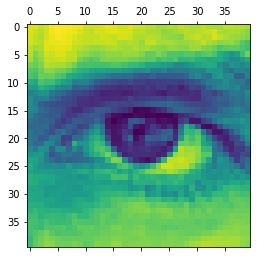

In [112]:
plt.matshow(xtrain[0])

In [113]:
ytrain[0]

'male'

## Data Pre-processing
It is necessary to bring all the images in the same shape and size, also convert them to their pixel values because all machine learning or deep learning models accepts only the numerical data. Also we need to convert all the labels from categorical to numerical values.

1) one hot encoding for converting all the labels from categorical to numerical values. (male: 1 and female: 0)


In [114]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
final_y=encode.fit_transform(ytrain)
final_y

array([1, 0, 0, ..., 1, 1, 0])

In [115]:
xtrain=np.asarray(xtrain)/255

In [116]:
X_train_flatten=xtrain.reshape(len(xtrain), 40*40)

## Building Model & Hyperparameter tuning
Now we are finally ready, and we can train the model.


In [119]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(xtrain,final_y,test_size=0.2,random_state=42)

In [120]:
cnn=models.Sequential([
                      layers.experimental.preprocessing.Rescaling(1/1, input_shape=(40,40, 1)),
                       layers.MaxPool2D((2,2)),

                       layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D((2,2)),

                       layers.Flatten(),
                       layers.Dense(64,activation='relu'),
                       layers.Dense(1,activation='sigmoid')     
])

In [121]:
cnn.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [122]:
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
#clearing logs
!rm -rf ./logs/ 

In [123]:
from datetime import datetime
logs_dir="logs/fit/"+str(datetime.now())
tensorboard_callback=TensorBoard(log_dir=logs_dir,histogram_freq=1)
early_stopping=EarlyStopping(monitor="val_loss",min_delta=0,patience=5,verbose=0,mode='auto',baseline=None,restore_best_weights=True)

In [107]:
cnn.fit(xtrain,final_y,epochs=20,callbacks=[tensorboard_callback,early_stopping],validation_data=(X_valid,y_valid),verbose=1)

Epoch 1/20
289/289 [==============================] - 5s 16ms/step - loss: 0.5722 - accuracy: 0.7004 - val_loss: 0.4710 - val_accuracy: 0.7630
Epoch 2/20
289/289 [==============================] - 4s 15ms/step - loss: 0.4481 - accuracy: 0.7932 - val_loss: 0.3930 - val_accuracy: 0.8319
Epoch 3/20
289/289 [==============================] - 4s 15ms/step - loss: 0.3944 - accuracy: 0.8266 - val_loss: 0.3479 - val_accuracy: 0.8585
Epoch 4/20
289/289 [==============================] - 4s 15ms/step - loss: 0.3656 - accuracy: 0.8428 - val_loss: 0.3287 - val_accuracy: 0.8633
Epoch 5/20
289/289 [==============================] - 4s 15ms/step - loss: 0.3420 - accuracy: 0.8547 - val_loss: 0.3011 - val_accuracy: 0.8736
Epoch 6/20
289/289 [==============================] - 4s 15ms/step - loss: 0.3246 - accuracy: 0.8644 - val_loss: 0.2847 - val_accuracy: 0.8856
Epoch 7/20
289/289 [==============================] - 4s 15ms/step - loss: 0.3128 - accuracy: 0.8678 - val_loss: 0.2897 - val_accuracy: 0.8791

## Predict The Output For Testing Dataset 😅
We have trained our model, evaluated it and now finally we will predict the output/target for the testing data (i.e. Test.csv).

#### Load Test Set
Load the test data on which final submission is to be made.

In [125]:
from tensorflow.keras.preprocessing import image
images = []
name=[]
folder_path='/content/content/eye_gender_data/test'
print(len(os.listdir(folder_path)))
for img in os.listdir(folder_path):
    name.append(img)
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(40,40),color_mode='grayscale')
    img = image.img_to_array(img)
    images.append(img)

2305


## Data Pre-processing on test_data


In [126]:
final=np.asarray(images)/255.0

### Make Prediction on Test Dataset
Time to make a submission!!!

In [127]:
prediction=cnn.predict(final)

In [128]:
predictions=[]
for i in prediction:
  if i>=0.5:
    predictions.append('male')
  else:
    predictions.append('female')

In [129]:
data={}
for i in range(len(name)):
  data[name[i]]=predictions[i]

In [130]:
final_file=[]
cs=pd.read_csv('/content/content/eye_gender_data/Testing_set.csv')
for i in cs['filename']:
  final_file.append(data[i])

## **How to save prediction results locally via colab notebook?**
If you are working on Google Colab Notebook, execute below block of codes. A file named 'prediction_results' will be downloaded in your system.

In [131]:
res = pd.DataFrame({'label': predictions})  # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv", index = False) 

# To download the csv file locally
from google.colab import files        
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Well Done! 👍**
You are all set to make a submission. Let's head to the **[challenge page](https://dphi.tech/challenges/4-week-deep-learning-online-bootcamp-final-assignment-sex-determination-by-morphometry-of-eyes/144/submit)** to make the submission.